In [3]:
import sys
sys.path.append("../src")
from utils import *
import gudhi.wasserstein
import numpy as np
import json

# Wasserstein

In [1]:
data_path = "../data/"
domains = ["tw", "az", "mv", "fi"]

In [4]:
bert_dict = load_bert(data_path, domains, 2000)

In [7]:
bert_dict['tw']

array([[ 0.16879809,  0.20386301,  0.12485105, ...,  0.09144359,
         0.42622706,  0.35297948],
       [ 0.17979693,  0.17714846,  0.12755731, ..., -0.22662926,
         0.56577098,  0.29162675],
       [-0.03082147,  0.12462155,  0.33992708, ..., -0.12671785,
         0.30370981,  0.40641078],
       ...,
       [ 0.01679105, -0.05794072,  0.26865858, ..., -0.09854423,
         0.20043452,  0.32295102],
       [-0.34330243,  0.08754142,  0.03121303, ..., -0.18173587,
         0.49394789,  0.29293314],
       [-0.00463631,  0.15481836,  0.00374458, ..., -0.15286168,
         0.42362815,  0.28003868]])

In [53]:
# costs = {}
# for domain1 in domains:
#     for domain2 in domains:
#         key = domain1 + "_" + domain2
#         cost, _ = gudhi.wasserstein.wasserstein_distance(bert_dict[domain1 + "2000"], bert_dict[domain2 + "2000"], matching=True, order=1, internal_p=2)
#         costs[key] = cost
costs

In [8]:
costs_matching_false = {}
for domain1 in domains:
    for domain2 in domains:
        key = domain1 + "_to_" + domain2
        cost = gudhi.wasserstein.wasserstein_distance(bert_dict[domain1], bert_dict[domain2], matching = False, order=1, internal_p=2)
        costs_matching_false[key] = cost

In [9]:
costs_matching_false

{'tw_to_tw': -259.58421784066746,
 'tw_to_az': -208.77176818410055,
 'tw_to_mv': -341.0015264568349,
 'tw_to_fi': -56.293118772074045,
 'az_to_tw': -208.77176818410112,
 'az_to_az': -359.29168516258244,
 'az_to_mv': -416.22717321514114,
 'az_to_fi': -131.51876553038102,
 'mv_to_tw': -341.00152645683335,
 'mv_to_az': -416.2271732151396,
 'mv_to_mv': -578.0109606507617,
 'mv_to_fi': -263.74852380311336,
 'fi_to_tw': -56.29311877207405,
 'fi_to_az': -131.5187655303806,
 'fi_to_mv': -263.7485238031135,
 'fi_to_fi': -79.50584750246301}

In [34]:
with open('../outputs/accuracies_ti_all_domains.json') as f:
    accuracies_ti = json.load(f)

# print(accuracies_ti)

t1_accuracies = {}
for exp in accuracies_ti:
    t1_accuracies_exp = []
    for group in accuracies_ti[exp]:
        if group != "no_self_train_adaptation_score":
            t1_accuracies_exp.append(accuracies_ti[exp][group][0])
        else:
            t1_accuracies_exp.append(accuracies_ti[exp][group])
    t1_accuracies[exp] = t1_accuracies_exp

# print(t1_accuracies)

tn_accuracies = {}
for exp in accuracies_ti:
    tn_accuracies_exp = []
    for group in accuracies_ti[exp]:
        if group != "no_self_train_adaptation_score":
            tn_accuracies_exp.append(accuracies_ti[exp][group][-1])
        else:
            tn_accuracies_exp.append(accuracies_ti[exp][group])
    tn_accuracies[exp] = tn_accuracies_exp

# print(tn_accuracies)

In [35]:
st_accuracies_improv_perc = {}
for exp in t1_accuracies:
    st_accuracies_improv_perc[exp] = (t1_accuracies[exp][1] - t1_accuracies[exp][0])/t1_accuracies[exp][0]*100
    
st_accuracies_improv = {}
for exp in t1_accuracies:
    st_accuracies_improv[exp] = (t1_accuracies[exp][1] - t1_accuracies[exp][0])
    
st_accuracies = {}
for exp in t1_accuracies:
    st_accuracies[exp] = t1_accuracies[exp][:4]

In [59]:
costs_matching_false, st_accuracies_improv, 

({'tw_tw': -259.58421784066746,
  'tw_az': -208.77176818410055,
  'tw_mv': -341.0015264568349,
  'tw_fi': -56.293118772074045,
  'az_tw': -208.77176818410112,
  'az_az': -359.29168516258244,
  'az_mv': -416.22717321514114,
  'az_fi': -131.51876553038102,
  'mv_tw': -341.00152645683335,
  'mv_az': -416.2271732151396,
  'mv_mv': -578.0109606507617,
  'mv_fi': -263.74852380311336,
  'fi_tw': -56.29311877207405,
  'fi_az': -131.5187655303806,
  'fi_mv': -263.7485238031135,
  'fi_fi': -79.50584750246301},
 {'tw_to_tw': -0.0024999999999999467,
  'tw_to_az': 0.0020000000000000018,
  'tw_to_mv': -0.0030000000000000027,
  'tw_to_fi': 0.0008438818565401629,
  'az_to_tw': -0.00649999999999995,
  'az_to_az': 0.0,
  'az_to_mv': -0.0025000000000000577,
  'az_to_fi': 0.0016877637130801038,
  'mv_to_tw': 0.0015000000000000568,
  'mv_to_az': -0.0010000000000000009,
  'mv_to_mv': -0.0004999999999999449,
  'mv_to_fi': -0.0008438818565400519,
  'fi_to_tw': 0.0,
  'fi_to_az': 0.0008438818565400519,
  'fi_t

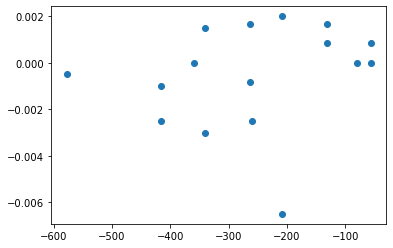

In [63]:
plt.scatter(costs_matching_false.values(), st_accuracies_improv.values())
plt.show()

# Maximum Mean Distance

In [12]:
# https://www.kaggle.com/onurtunali/maximum-mean-discrepancy
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import multivariate_normal
from scipy.stats import dirichlet 
from torch.distributions.multivariate_normal import MultivariateNormal 

In [49]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def MMD(x, y, kernel):
    """Emprical maximum mean discrepancy. The lower the result
       the more evidence that distributions are the same.

    Args:
        x: first sample, distribution P
        y: second sample, distribution Q
        kernel: kernel type such as "multiscale" or "rbf"
    """
    xx, yy, zz = torch.mm(x, x.t()), torch.mm(y, y.t()), torch.mm(x, y.t())
    rx = (xx.diag().unsqueeze(0).expand_as(xx))
    ry = (yy.diag().unsqueeze(0).expand_as(yy))
    
    dxx = rx.t() + rx - 2. * xx # Used for A in (1)
    dyy = ry.t() + ry - 2. * yy # Used for B in (1)
    dxy = rx.t() + ry - 2. * zz # Used for C in (1)
    
    XX, YY, XY = (torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device))
    
    if kernel == "multiscale":
        
        bandwidth_range = [0.2, 0.5, 0.9, 1.3]
        for a in bandwidth_range:
            XX += a**2 * (a**2 + dxx)**-1
            YY += a**2 * (a**2 + dyy)**-1
            XY += a**2 * (a**2 + dxy)**-1
            
    if kernel == "rbf":
      
        bandwidth_range = [10, 15, 20, 50]
        for a in bandwidth_range:
            XX += torch.exp(-0.5*dxx/a)
            YY += torch.exp(-0.5*dyy/a)
            XY += torch.exp(-0.5*dxy/a)

    return torch.mean(XX + YY - 2. * XY)

In [57]:
mdd_multi ={}
for source in ["tw", "az", "mv"]:
    for target in ["tw", "az", "mv"]:
        mdd_multi[source + "_to_" + target] = MMD(torch.Tensor(bert_dict[source]), torch.Tensor(bert_dict[target]), kernel="multiscale").item()
        
mdd_rbf ={}
for source in ["tw", "az", "mv"]:
    for target in ["tw", "az", "mv"]:
        mdd_rbf[source + "_to_" + target] = MMD(torch.Tensor(bert_dict[source]), torch.Tensor(bert_dict[target]), kernel="rbf").item()

In [58]:
mdd_multi, mdd_rbf

({'tw_to_tw': 0.0,
  'tw_to_az': 0.05946696922183037,
  'tw_to_mv': 0.11865703761577606,
  'az_to_tw': 0.059466976672410965,
  'az_to_az': 0.0,
  'az_to_mv': 0.059931132942438126,
  'mv_to_tw': 0.11865704506635666,
  'mv_to_az': 0.059931132942438126,
  'mv_to_mv': 0.0},
 {'tw_to_tw': 0.0,
  'tw_to_az': 0.6604963541030884,
  'tw_to_mv': 1.2572532892227173,
  'az_to_tw': 0.6604964137077332,
  'az_to_az': 0.0,
  'az_to_mv': 0.5300790667533875,
  'mv_to_tw': 1.2572532892227173,
  'mv_to_az': 0.5300790071487427,
  'mv_to_mv': 0.0})

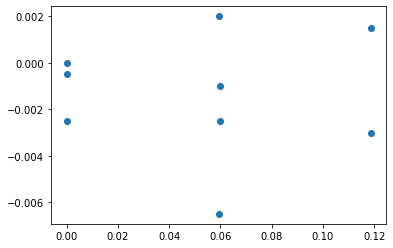

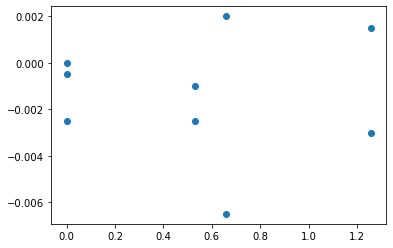

In [59]:
imprv = {}
for t in st_accuracies_improv:
    if t in mdd:
        imprv[t] = st_accuracies_improv[t]
imprv

st_accuracies_improv
plt.scatter(mdd_multi.values(), imprv.values())
plt.show()

st_accuracies_improv
plt.scatter(mdd_rbf.values(), imprv.values())
plt.show()

# Fisher
https://sthalles.github.io/fisher-linear-discriminant/